# 梯度下降优化算法的概述

# 1.梯度下降
梯度下降法是机器学习中最常用的优化方法之一，常用来求解目标函数的极值。  
其基本原理非常简单：沿着目标函数$J(\theta)$梯度下降的方向搜索极小值(也可以沿着梯度上升的方向搜索极大值)。  
学习率$\eta$，也叫步长决定了每一次迭代过程中，会往梯度下降的方向移动的距离。   
如果步长很大，算法会在局部最优点附近来回跳动，不会收敛；步长太短，算法每步移动的距离会很短，导致算法收敛速度很慢。  
对于每个样本i，定义一个损失$J_i(\theta)$,总的损失就是：  
$$J(\theta)=\dfrac{1}{n}\sum_{i=1}^nJ_i(\theta)$$  
换句话说，我们在目标函数的超平面上，沿着梯度下降的方向前进，直到我们遇到了超平面构成的「谷底」。
## 1.1 梯度下降变体  
如下有三种梯度下降的变体，分别是批量梯度下降，随机梯度下降和小批量梯度下降。  
它们在用多少数据来计算目标函数的梯度方面有所不同。根据数据量，我们在参数更新的准确性和执行更新所花费的时间之间进行权衡。
### 1.1.1 Batch gradient descent-批量梯度下降
计算损失函数关于参数$\theta$在整个训练集上的梯度，更新公式为：
$$\theta=\theta-\eta\cdot\nabla_\theta J(\theta)$$  

由于我们需要计算整个数据集的梯度以执行一次更新，所以批量梯度下降可能非常缓慢，并且对于较大的，内存无法容纳的数据集而言是棘手的。批量梯度下降也不允许我们在线更新我们的模型，即不能在运行中加入新的样本进运算。  

- 批梯度下降的伪代码如下：  
> 每个参数初始化  
重复 nb_epochs次：
> - 计算整个数据集的梯度  
> - 使用$-\eta\times \mathrm{gradient}$更新回归系数的向量  

>  返回回归系数

In [ ]:
for i in range(nb_epochs):
    params_grad=evaluate_gradient(loss_function,data,params)
    params=params-learning*rate*params_grad

我们用负梯度方向更新我们的参数，学习速率决定了我们执行的更新的大小。
- 批量梯度下降保证收敛到凸误差面的全局最小值和非凸面的局部最小值。也就是，当目标函数$J(\theta)$为凸函数时，则批量梯度下降法必然会在全局最小值处收敛；否则，目标函数则可能会在局部极小值处收敛。  

- 形象地理解：  
假如你坐在一座山顶上的雪橇上，望着另一座山丘。如果你滑下山丘，你会自然地往下移动，直到你最终停在山脚。如果第一座小山足够陡峭，你可能会开始滑上另一座山的一侧。从这个比喻中你可以想到：    
> $\theta$: As position on the hill  
$\nabla_\theta J(\theta)$: As Steepness at point theta   
$\eta$: As $dfrac{1}{\mathrm{friction}}$  
学习率越高意味着摩擦力越小，因此雪橇会像在冰上一样沿着山坡下滑；低的学习率意味着摩擦力大，雪橇会像在地毯上一样，难以滑下。

### 1.1.2 Stochastic gradient descent-随机梯度下降
相对于批量梯度下降法，随机梯度下降的每次更新是对数据集中的一个训练样本$(x^{(i)},y^{(i)})$求出罚函数和梯度再进行参数更新：  
$$\theta=\theta-\eta\nabla_\theta J(\theta;x^{(i)},y^{(i)})$$  

因为批量梯度下降法在每次更新前，会对所有样本求梯度，包括了很多相似样本，因而它在较大的数据集上的计算会产生冗余。  
而SGD每次更新仅对一个样本求梯度，去除了这种冗余的情况。因此通常要快得多，也可以用来在线学习。  
- 注意： 
> - 随机梯度下降法更新值的方差很大，在频繁的更新下，它的目标函数会产生剧烈波动。 
> - 相对于批量随机梯度下降法的收敛会使目标函数落入一个局部最小值，SGD收敛过程的波动，会帮助目标函数跳入另一个可能的极小值。持续的波动会让收敛到特定最小值的过程复杂化。  
> - 相似点：SGD与BGD收敛过程相似，对于非凸和凸函数，必然会分别收敛到它们的极小值和最小值。  

- 相比于批量梯度下降的算法，我们仅仅加入了一个循环，用以遍历所有的样本并求出相应的梯度值。这里，每次迭代时，我们会打乱训练数据集。

- 随机梯度下降算法的伪代码如下：  
> 所有参数初始化    
重复 nb_epochs次：  
 - 对于数据集中的每个样本
>- 计算该样本的梯度  
>- 使用$-\eta\times\mathrm{gradient}$更新回归系数值   

> 返回回归系数

In [ ]:
for i in range(nb_epochs):
    np.random.shuffle(data):
        for example in data:
            params_grad=evaluate_gradient(loss_function,example,params)
            params=params-learning_rate*params_grad

### 1.1.3 Mini-Batch Gradient Descent-小批量梯度下降法


### 1.2 梯度下降编程

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#目标函数
def func(x):
    return np.square(x)
# 目标函数一阶导数
def dfunc(x):
    return 2*x
##梯度下降算法
def GD(x_start,df,epochs,lr):
    '''
    梯度下降法，给定初始点与目标函数的一阶导数，求在epochs次迭代中x的更新值
    :param x_start: x初始点
    :param df 目标函数的一阶导函数
    :param epochs:迭代周期
    :param lr:学习率
    :return: x在每次迭代后的位置(包括起始点)，长度为epochs+1
    '''
    xs=np.zeros(epochs+1)
    x=x_start
    xs[0]=x
    for i in range(epochs):
        dx=df(x)
        x=x-lr*df(x)
        xs[i+1]=x
    return xs
##测试代码，假设起始点为-5，迭代周期为5，学习率为0.3
def demo0_GD():
    x_start=-5
    epochs=5
    lr=0.3
    x=GD(x_start,dfunc,epochs,lr)
    print(x)

In [3]:
demo0_GD()

[-5.     -2.     -0.8    -0.32   -0.128  -0.0512]


In [4]:
#修改demo0_GD可视化结果
def demo0_GD1():
    '''演示如何使用梯度下降法'''
    line_x=np.linspace(-5,5,100)
    line_y=func(line_x)
    
    x_start=-5
    epochs=5
    
    lr=0.3
    x=GD(x_start,dfunc,epochs,lr)
    
    color='r'
    plt.plot(line_x,line_y,c='b')
    plt.plot(x,func(x),c=color,label='lr={}'.format(lr))
    plt.scatter(x,func(x),c=color,)
    plt.legend()
    plt.show()

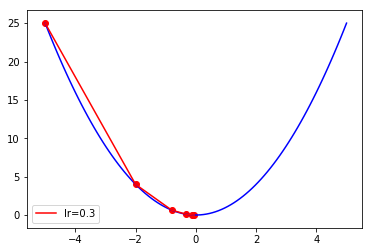

In [5]:
demo0_GD1()

### 1.2.1 学习率问题：
梯度下降法确实是求解非线性方程极值的利器之一，但是如果学习率没有调整好的话，会出现不同的状况。下面在上节代码的基础上，我们设置学习率分别为0.1，0.3和0.9：

In [12]:
def demo0_GD2():
    '''演示如何使用梯度下降法'''
    line_x=np.linspace(-5,5,100)
    line_y=func(line_x)
    
    x_start=-5
    epochs=5
    
    lr=[0.1,0.3,0.9]
    
    
    color=['r','g','y']
    size=np.ones(epochs+1)*10
    size[-1]=70
    for i in range(len(lr)):
        x=GD(x_start,dfunc,epochs,lr=lr[i])
        plt.subplot(1,3,i+1)
        plt.plot(line_x,line_y,c='b')
        plt.plot(x,func(x),c=color[i],label='lr={}'.format(lr[i]))
        plt.scatter(x,func(x),c=color[i])
        plt.legend()
    plt.show()

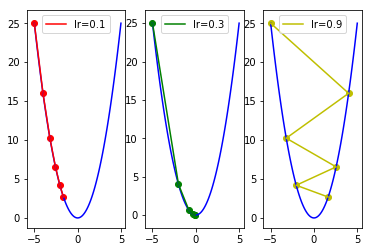

In [13]:
demo0_GD2()

### 结论：
在迭代周期不变时：
- 学习率较小，收敛到正确结果的速度较慢；
- 学习率较大，容易在搜索的过程中发生振荡。  
因此，学习率的大小对梯度下降法的搜索过程起着非常大的影响。  
> - 比较常见的用法时使得步长满足如下条件：  
$$\sum_{k=1}^{\infty}\eta_k>\infty,\sum_{k=1}^{\infty}\eta_k^2<\infty$$  
(比如$\eta=1/k$)这样可以使得步长在迭代的过程中逐渐减小。学习率属于调节参数，需要不断训练模型的时候进行调节，最终达到相对收敛。

### 1.2.2 局部最优问题：
因为权重会走向梯度带它去的位置，它们有可能停留在误差小，但是不是最小的地方。这个点被称为局部最低点。如果权重初始值有错，梯度下降可能会使权重陷入局部最优，如下图所示：

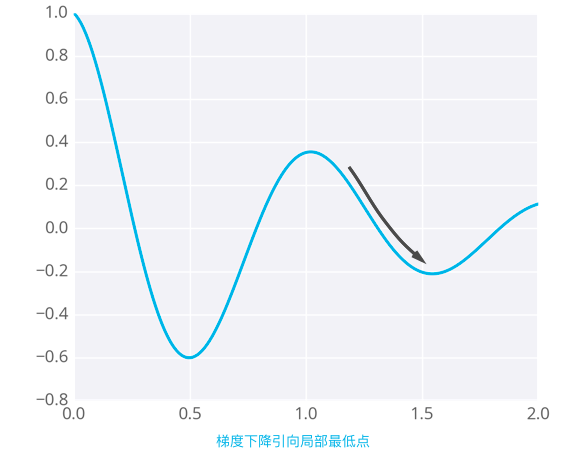

In [1]:
from IPython.display import Image
Image("/Users/shangshuhan/practice/7.png")

梯度下降：梯度下降就是我上面的推导，要留意，在梯度下降中，对于θ
θ
的更新，所有的样本都有贡献，也就是参与调整θ
θ
.其计算得到的是一个标准梯度。因而理论上来说一次更新的幅度是比较大的。如果样本不多的情况下，当然是这样收敛的速度会更快啦~

随机梯度下降：可以看到多了随机两个字，随机也就是说我用样本中的一个例子来近似我所有的样本，来调整θ
θ
，因而随机梯度下降是会带来一定的问题，因为计算得到的并不是准确的一个梯度，容易陷入到局部最优解中

批量梯度下降：其实批量的梯度下降就是一种折中的方法，他用了一些小样本来近似全部的，其本质就是我1个指不定不太准，那我用个30个50个样本那比随机的要准不少了吧，而且批量的话还是非常可以反映样本的一个分布情况的。

有方法可以避免这一点，称作momentum.
## 2. momentum(动量方法)
SGD方法的一个缺点是，其更新方向完全取决于当前的batch,因而其更新十分不稳定。解决这一问题的简单做法就是引入momentum。
"动量"这个概念源自物理中的力学，表示力对时间的累积效应。它模拟的是物体运动时的惯性，即在更新的时候一定程度上保留之前更新的方向，同时利用当前batch的梯度微调最终的更新方向。这样一来，可以在一定程度上增加稳定性，从而学习的更快，并且还有一定的摆脱局部最优的能力：  
$$\Delta \theta_t=\rho \theta_{t-1}-\eta \nabla_{\theta}J(\theta)$$  

其中，$\rho$即momentum,表示要在多大程度上保留原来的更新方向,这个值在0-1之间，在训练开始时，由于梯度可能会很大，所以初始值一般为0.5；当梯度不那么大时，改为0.9。$\eta$是学习率，即当前batch的梯度多大程度影响最重更新方向。跟普通SGD的含义相同。$\rho$和$\eta$的和不一定为1。

## 写在最后
归一化能提高梯度下降法求解最优解的速度  
- 原因：  
如下图所示，蓝色的圈圈图代表的是两个特征的等高线。其中左图两个特征X1和X2的区间相差非常大，X1区间是[0,2000]，X2区间是[1,5]，其所形成的等高线非常尖。当使用梯度下降法寻求最优解时，很有可能走“之字型”路线（垂直等高线走），从而导致需要迭代很多次才能收敛；  
而右图对两个原始特征进行了归一化，其对应的等高线显得很圆，在梯度下降进行求解时能较快的收敛。  
因此如果机器学习模型使用梯度下降法求最优解时，归一化往往非常有必要，否则很难收敛甚至不能收敛。

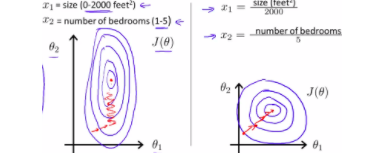

In [14]:
from IPython.display import Image
Image("/Users/shangshuhan/practice/11.png")